# DW_pandas_Test2

## 20210111

DataWhale_pandas组队学习测试二，期末考试。

In [1]:
import pandas as pd
import numpy as np

## 【任务四】
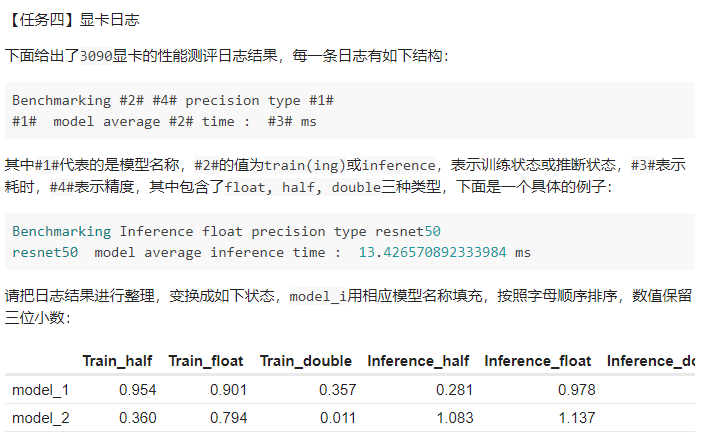

In [2]:
data = pd.read_table('./data/benchmark.txt', header=None)
data

,0
0,start
1,benchmark start : 2020/12/24 12:12:48
2,Number of GPUs on current device : 1
3,CUDA Version : 11.0
4,Cudnn Version : 8005
...,...
391,shufflenet_v2_x1_5 model average inference ti...
392,Benchmarking Inference double precision type s...
393,shufflenet_v2_x2_0 model average inference ti...
394,benchmark end : 2020/12/24 12:56:47


In [3]:
data = data.drop(labels=[394, 395], axis=0)   # 删除尾两行纪录
data

,0
0,start
1,benchmark start : 2020/12/24 12:12:48
2,Number of GPUs on current device : 1
3,CUDA Version : 11.0
4,Cudnn Version : 8005
...,...
389,shufflenet_v2_x1_0 model average inference ti...
390,Benchmarking Inference double precision type s...
391,shufflenet_v2_x1_5 model average inference ti...
392,Benchmarking Inference double precision type s...


In [4]:
data = data.drop(labels=range(0,10), axis=0)   #删除前10行纪录
data

,0
10,Benchmarking Training float precision type mna...
11,mnasnet0_5 model average train time : 28.527...
12,Benchmarking Training float precision type mna...
13,mnasnet0_75 model average train time : 34.10...
14,Benchmarking Training float precision type mna...
...,...
389,shufflenet_v2_x1_0 model average inference ti...
390,Benchmarking Inference double precision type s...
391,shufflenet_v2_x1_5 model average inference ti...
392,Benchmarking Inference double precision type s...


In [5]:
data1 = data[data.index%2==0]   # 导出偶数行生成新表并重置索引
data1 = data1.reset_index(drop=True)
data1

,0
0,Benchmarking Training float precision type mna...
1,Benchmarking Training float precision type mna...
2,Benchmarking Training float precision type mna...
3,Benchmarking Training float precision type mna...
4,Benchmarking Training float precision type res...
...,...
187,Benchmarking Inference double precision type m...
188,Benchmarking Inference double precision type s...
189,Benchmarking Inference double precision type s...
190,Benchmarking Inference double precision type s...


In [6]:
data2 = data[data.index%2==1]   # 导出偶数行生成新表并重置索引
data2 = data2.reset_index(drop=True)
data2.columns = [1]   # 重命名列
data2

,1
0,mnasnet0_5 model average train time : 28.527...
1,mnasnet0_75 model average train time : 34.10...
2,mnasnet1_0 model average train time : 34.313...
3,mnasnet1_3 model average train time : 35.556...
4,resnet18 model average train time : 18.66008...
...,...
187,mobilenet_v2 model average inference time : ...
188,shufflenet_v2_x0_5 model average inference ti...
189,shufflenet_v2_x1_0 model average inference ti...
190,shufflenet_v2_x1_5 model average inference ti...


In [7]:
data3 = pd.concat([data1, data2], axis=1)    # 合并两表
data3

,0,1
0,Benchmarking Training float precision type mna...,mnasnet0_5 model average train time : 28.527...
1,Benchmarking Training float precision type mna...,mnasnet0_75 model average train time : 34.10...
2,Benchmarking Training float precision type mna...,mnasnet1_0 model average train time : 34.313...
3,Benchmarking Training float precision type mna...,mnasnet1_3 model average train time : 35.556...
4,Benchmarking Training float precision type res...,resnet18 model average train time : 18.66008...
...,...,...
187,Benchmarking Inference double precision type m...,mobilenet_v2 model average inference time : ...
188,Benchmarking Inference double precision type s...,shufflenet_v2_x0_5 model average inference ti...
189,Benchmarking Inference double precision type s...,shufflenet_v2_x1_0 model average inference ti...
190,Benchmarking Inference double precision type s...,shufflenet_v2_x1_5 model average inference ti...


In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       192 non-null    object
 1   1       192 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [9]:
data3['new'] = data3[0] +  ' ' + data3[1]   # 将两列内容合并成一列，并删除原两例数据
data3 = data3.drop([0, 1], axis=1)  
data3

,new
0,Benchmarking Training float precision type mna...
1,Benchmarking Training float precision type mna...
2,Benchmarking Training float precision type mna...
3,Benchmarking Training float precision type mna...
4,Benchmarking Training float precision type res...
...,...
187,Benchmarking Inference double precision type m...
188,Benchmarking Inference double precision type s...
189,Benchmarking Inference double precision type s...
190,Benchmarking Inference double precision type s...


In [10]:
data4 = data3['new'].str.split(' ', expand=True)   # 根据得到的新数据进行拆分，获得每项数据
data4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Benchmarking,Training,float,precision,type,mnasnet0_5,mnasnet0_5,,model,average,train,time,:,,28.527636528015137,ms
1,Benchmarking,Training,float,precision,type,mnasnet0_75,mnasnet0_75,,model,average,train,time,:,,34.10548686981201,ms
2,Benchmarking,Training,float,precision,type,mnasnet1_0,mnasnet1_0,,model,average,train,time,:,,34.31377410888672,ms
3,Benchmarking,Training,float,precision,type,mnasnet1_3,mnasnet1_3,,model,average,train,time,:,,35.556888580322266,ms
4,Benchmarking,Training,float,precision,type,resnet18,resnet18,,model,average,train,time,:,,18.660082817077637,ms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Benchmarking,Inference,double,precision,type,mobilenet_v2,mobilenet_v2,,model,average,inference,time,:,,25.47874927520752,ms
188,Benchmarking,Inference,double,precision,type,shufflenet_v2_x0_5,shufflenet_v2_x0_5,,model,average,inference,time,:,,11.498098373413086,ms
189,Benchmarking,Inference,double,precision,type,shufflenet_v2_x1_0,shufflenet_v2_x1_0,,model,average,inference,time,:,,12.888350486755371,ms
190,Benchmarking,Inference,double,precision,type,shufflenet_v2_x1_5,shufflenet_v2_x1_5,,model,average,inference,time,:,,21.520133018493652,ms


In [11]:
data4[2].unique()   # 查看唯一值

array(['float', 'half', 'double'], dtype=object)

In [12]:
data4[10].unique()   # 查看唯一值

array(['train', 'inference'], dtype=object)

In [13]:
data5 = data4.drop([0, 1, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15], axis=1)   # 删除多余的列
data5

,2,5,10,14
0,float,mnasnet0_5,train,28.527636528015137
1,float,mnasnet0_75,train,34.10548686981201
2,float,mnasnet1_0,train,34.31377410888672
3,float,mnasnet1_3,train,35.556888580322266
4,float,resnet18,train,18.660082817077637
...,...,...,...,...
187,double,mobilenet_v2,inference,25.47874927520752
188,double,shufflenet_v2_x0_5,inference,11.498098373413086
189,double,shufflenet_v2_x1_0,inference,12.888350486755371
190,double,shufflenet_v2_x1_5,inference,21.520133018493652


In [14]:
data5['new'] = data5[10] + '_' + data5[2]   # 将2，10列合并成新的列，并删除旧列
data5 = data5.drop([2, 10], axis=1)
data5

,5,14,new
0,mnasnet0_5,28.527636528015137,train_float
1,mnasnet0_75,34.10548686981201,train_float
2,mnasnet1_0,34.31377410888672,train_float
3,mnasnet1_3,35.556888580322266,train_float
4,resnet18,18.660082817077637,train_float
...,...,...,...
187,mobilenet_v2,25.47874927520752,inference_double
188,shufflenet_v2_x0_5,11.498098373413086,inference_double
189,shufflenet_v2_x1_0,12.888350486755371,inference_double
190,shufflenet_v2_x1_5,21.520133018493652,inference_double


In [15]:
data5[14] = data5[14].astype(float).round(3)   # 将数值保留三位小数
data5

,5,14,new
0,mnasnet0_5,28.528,train_float
1,mnasnet0_75,34.105,train_float
2,mnasnet1_0,34.314,train_float
3,mnasnet1_3,35.557,train_float
4,resnet18,18.660,train_float
...,...,...,...
187,mobilenet_v2,25.479,inference_double
188,shufflenet_v2_x0_5,11.498,inference_double
189,shufflenet_v2_x1_0,12.888,inference_double
190,shufflenet_v2_x1_5,21.520,inference_double


In [16]:
data5.new = data5.new.str.capitalize()   # 改变字符串为首字母大写
data5.head()

,5,14,new
0,mnasnet0_5,28.528,Train_float
1,mnasnet0_75,34.105,Train_float
2,mnasnet1_0,34.314,Train_float
3,mnasnet1_3,35.557,Train_float
4,resnet18,18.660,Train_float


In [17]:
data6 = data5.pivot(index=5, columns='new', values=14)   # 利用长宽表进行转换
data6.head()

new,Inference_double,Inference_float,Inference_half,Train_double,Train_float,Train_half
5,,,,,,
densenet121,144.111,15.637,19.772,417.207,93.357,88.976
densenet161,511.177,31.750,27.555,1290.287,136.624,144.319
densenet169,175.808,21.598,26.371,511.404,104.840,121.556
densenet201,223.960,26.169,33.394,654.365,129.334,118.940
mnasnet0_5,11.870,8.039,6.929,48.232,28.528,27.198


In [18]:
data6 = data6.rename_axis(None)   # 重命名列索引名称
data6.columns.name = ''
data6.head()

,Inference_double,Inference_float,Inference_half,Train_double,Train_float,Train_half
densenet121,144.111,15.637,19.772,417.207,93.357,88.976
densenet161,511.177,31.750,27.555,1290.287,136.624,144.319
densenet169,175.808,21.598,26.371,511.404,104.840,121.556
densenet201,223.960,26.169,33.394,654.365,129.334,118.940
mnasnet0_5,11.870,8.039,6.929,48.232,28.528,27.198


In [19]:
data6 = data6.sort_index(axis=1, ascending=False)   # 对列进行重排序
data6.head()

,Train_half,Train_float,Train_double,Inference_half,Inference_float,Inference_double
densenet121,88.976,93.357,417.207,19.772,15.637,144.111
densenet161,144.319,136.624,1290.287,27.555,31.750,511.177
densenet169,121.556,104.840,511.404,26.371,21.598,175.808
densenet201,118.940,129.334,654.365,33.394,26.169,223.960
mnasnet0_5,27.198,28.528,48.232,6.929,8.039,11.870


总算完成一题，中间踩坑无数，在长宽表转换后对索引的处理花了很长时间，基础知识不扎的原因，一直绕不出去；完成到最后改了两个中间疏忽的点，一是在两张表格合并时没有加空格，导致模型名称显示两个，二是做到最后发现列名首位应为大写，然后回到前面将字符串调整。

## 【任务五】
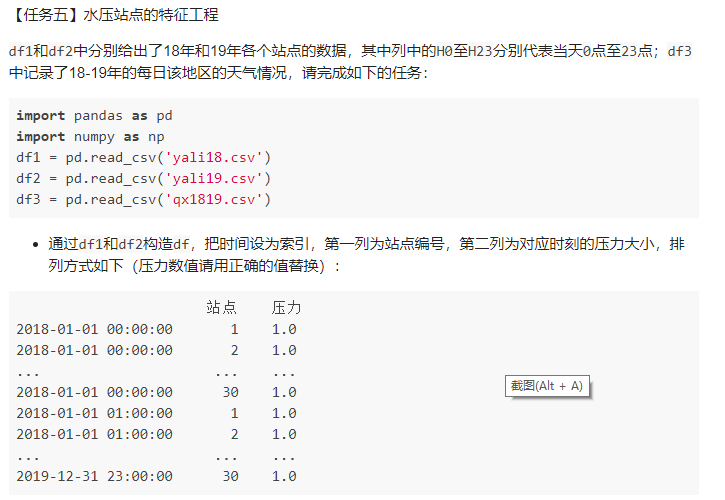

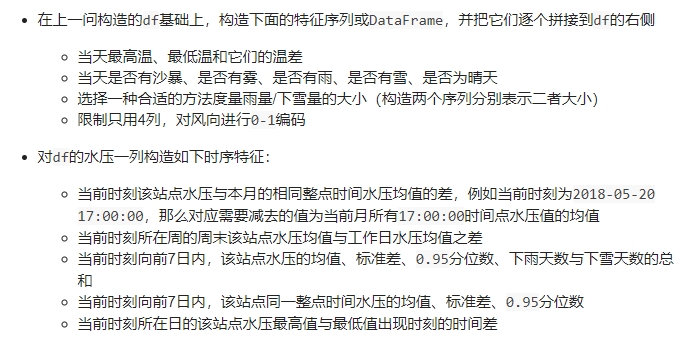

In [20]:
df1 = pd.read_csv('./data/yali18.csv')
df2 = pd.read_csv('./data/yali19.csv')
df3 = pd.read_csv('./data/qx1819.csv')
df1.head()

,Time,MeasName,H0,H1,H2,H3,H4,H5,H6,H7,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
0,2018-01-01,站点4,0.402750,0.407625,0.418125,0.425250,0.426000,0.425250,0.417375,0.426375,...,0.348750,0.359250,0.355500,0.344250,0.352125,0.356250,0.347250,0.343875,0.356625,0.418875
1,2018-01-01,站点7,0.214375,0.226750,0.232375,0.233125,0.235000,0.232750,0.230875,0.220000,...,0.187375,0.196750,0.199750,0.192250,0.186250,0.183250,0.177250,0.163375,0.165250,0.199375
2,2018-01-01,站点22,0.247000,0.248125,0.271375,0.251125,0.272125,0.256375,0.257125,0.242500,...,0.245500,0.242875,0.238375,0.230875,0.237250,0.236875,0.236500,0.236500,0.241000,0.254500
3,2018-01-01,站点21,0.284250,0.289875,0.283500,0.281250,0.288375,0.288750,0.285750,0.255750,...,0.227625,0.238125,0.238500,0.218625,0.207000,0.212625,0.209250,0.189000,0.217875,0.270000
4,2018-01-01,站点20,0.292875,0.295875,0.305250,0.298875,0.310125,0.300750,0.288375,0.262500,...,0.247500,0.241125,0.243375,0.232500,0.233625,0.224250,0.219375,0.202125,0.219375,0.286500


In [21]:
df2.head()

,Time,MeasName,H0,H1,H2,H3,H4,H5,H6,H7,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
0,2019-01-01,站点4,0.342000,0.429375,0.429000,0.440250,0.445875,0.444750,0.417750,0.387000,...,0.319875,0.326250,0.323625,0.322500,0.309000,0.307125,0.307125,0.307125,0.307125,0.307125
1,2019-01-01,站点7,0.215125,0.239500,0.257500,0.246250,0.275125,0.264625,0.229375,0.205375,...,0.180625,0.176500,0.181375,0.155125,0.159625,0.146125,0.144625,0.135250,0.158875,0.184750
2,2019-01-01,站点22,0.244750,0.248875,0.246625,0.247375,0.247375,0.245500,0.244000,0.239500,...,0.238000,0.236125,0.235375,0.238000,0.231250,0.232375,0.226750,0.227875,0.236125,0.242125
3,2019-01-01,站点21,0.228750,0.248250,0.258750,0.252750,0.264375,0.265875,0.237750,0.208125,...,0.200625,0.202125,0.198000,0.186750,0.185250,0.180000,0.174750,0.177375,0.192750,0.212625
4,2019-01-01,站点20,0.239125,0.260500,0.269125,0.263500,0.278125,0.279625,0.250375,0.216625,...,0.212500,0.214375,0.202000,0.199000,0.195250,0.188500,0.187750,0.186625,0.205000,0.225250


In [22]:
df3.head()

,日期,天气,气温,风向
0,2018-01-01,多云,1C～-4C,东南风 微风
1,2018-01-02,阴转多云,8C～0C,东北风 3-4级
2,2018-01-03,阴转小雪,1C～-1C,东北风 4-5级转4-5级
3,2018-01-04,阴,0C～-4C,东北风转北风 3-4级转3-4级
4,2018-01-05,阴转多云,3C～-4C,西风转北风 3-4级转3-4级


In [23]:
df12 = pd.concat([df1, df2])   # 合并两表
df12.tail()

,Time,MeasName,H0,H1,H2,H3,H4,H5,H6,H7,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
10945,2019-12-31,站点12,0.282625,0.283750,0.296500,0.283000,0.293500,0.267625,0.249250,0.216625,...,0.239125,0.248125,0.244750,0.224875,0.217000,0.217375,0.220375,0.213250,0.210250,0.232000
10946,2019-12-31,站点17,0.349125,0.333375,0.358125,0.350250,0.355875,0.334875,0.319500,0.301500,...,0.310500,0.319125,0.317625,0.305250,0.296625,0.294375,0.304500,0.303000,0.305625,0.304875
10947,2019-12-31,站点2,0.362375,0.350750,0.364250,0.354875,0.357875,0.345125,0.335000,0.324125,...,0.337250,0.345875,0.348125,0.326750,0.323000,0.324875,0.332750,0.330875,0.335000,0.332000
10948,2019-12-31,站点9,0.280125,0.318750,0.327375,0.326250,0.324000,0.308250,0.254625,0.171375,...,0.209250,0.221625,0.221250,0.187875,0.171000,0.183000,0.167250,0.178875,0.160875,0.201375
10949,2019-12-31,站点6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
# 将表进行长宽表转换
df121 = df12.melt(id_vars = ['Time', 'MeasName'],
                  value_vars = ['H{}'.format(i) for i in range(24)],
                  var_name = '时间',
                  value_name = '压力')
df121.head()

,Time,MeasName,时间,压力
0,2018-01-01,站点4,H0,0.402750
1,2018-01-01,站点7,H0,0.214375
2,2018-01-01,站点22,H0,0.247000
3,2018-01-01,站点21,H0,0.284250
4,2018-01-01,站点20,H0,0.292875


In [25]:
df121.时间 = pd.to_datetime(df121.时间, format='H%H')   # 转换时间列数据
df121.tail()

,Time,MeasName,时间,压力
525595,2019-12-31,站点12,1900-01-01 23:00:00,0.232000
525596,2019-12-31,站点17,1900-01-01 23:00:00,0.304875
525597,2019-12-31,站点2,1900-01-01 23:00:00,0.332000
525598,2019-12-31,站点9,1900-01-01 23:00:00,0.201375
525599,2019-12-31,站点6,1900-01-01 23:00:00,0.000000


In [26]:
df121.时间 = df121.时间.dt.time   # 提取部分数据
df121.head()

,Time,MeasName,时间,压力
0,2018-01-01,站点4,00:00:00,0.402750
1,2018-01-01,站点7,00:00:00,0.214375
2,2018-01-01,站点22,00:00:00,0.247000
3,2018-01-01,站点21,00:00:00,0.284250
4,2018-01-01,站点20,00:00:00,0.292875


In [27]:
df121.Time    # 查看Time数据

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
525595    2019-12-31
525596    2019-12-31
525597    2019-12-31
525598    2019-12-31
525599    2019-12-31
Name: Time, Length: 525600, dtype: object

In [28]:
df121.info()   #查看数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      525600 non-null  object 
 1   MeasName  525600 non-null  object 
 2   时间        525600 non-null  object 
 3   压力        525600 non-null  float64
dtypes: float64(1), object(3)
memory usage: 16.0+ MB


In [29]:
df121['new'] = df121.Time.map(str) + ' ' + df121.时间.map(str)   # 合并Time和时间数据到new列
df121.head()

,Time,MeasName,时间,压力,new
0,2018-01-01,站点4,00:00:00,0.402750,2018-01-01 00:00:00
1,2018-01-01,站点7,00:00:00,0.214375,2018-01-01 00:00:00
2,2018-01-01,站点22,00:00:00,0.247000,2018-01-01 00:00:00
3,2018-01-01,站点21,00:00:00,0.284250,2018-01-01 00:00:00
4,2018-01-01,站点20,00:00:00,0.292875,2018-01-01 00:00:00


In [30]:
df121.tail()

,Time,MeasName,时间,压力,new
525595,2019-12-31,站点12,23:00:00,0.232000,2019-12-31 23:00:00
525596,2019-12-31,站点17,23:00:00,0.304875,2019-12-31 23:00:00
525597,2019-12-31,站点2,23:00:00,0.332000,2019-12-31 23:00:00
525598,2019-12-31,站点9,23:00:00,0.201375,2019-12-31 23:00:00
525599,2019-12-31,站点6,23:00:00,0.000000,2019-12-31 23:00:00


In [31]:
df121 = df121.drop(['Time', '时间'], axis=1)   # 删除多余的列
df121.head()

,MeasName,压力,new
0,站点4,0.402750,2018-01-01 00:00:00
1,站点7,0.214375,2018-01-01 00:00:00
2,站点22,0.247000,2018-01-01 00:00:00
3,站点21,0.284250,2018-01-01 00:00:00
4,站点20,0.292875,2018-01-01 00:00:00


In [32]:
df121.rename(columns={'MeasName': '站点'}, inplace = True)    # 改变列名
df121.head()

,站点,压力,new
0,站点4,0.402750,2018-01-01 00:00:00
1,站点7,0.214375,2018-01-01 00:00:00
2,站点22,0.247000,2018-01-01 00:00:00
3,站点21,0.284250,2018-01-01 00:00:00
4,站点20,0.292875,2018-01-01 00:00:00


In [38]:
df121 = df121.sort_values(['new', '站点'])   # 按时间和站点排序
df121.head()

,站点,压力,new
9,站点1,0.288625,2018-01-01 00:00:00
15,站点10,0.271875,2018-01-01 00:00:00
12,站点11,0.260625,2018-01-01 00:00:00
25,站点12,0.280875,2018-01-01 00:00:00
19,站点13,0.292500,2018-01-01 00:00:00


In [39]:
df121 = df121.set_index('new')   # 根据时间进行索引排序
df121.head()

,站点,压力
new,,
2018-01-01 00:00:00,站点1,0.288625
2018-01-01 00:00:00,站点10,0.271875
2018-01-01 00:00:00,站点11,0.260625
2018-01-01 00:00:00,站点12,0.280875
2018-01-01 00:00:00,站点13,0.292500


In [40]:
df121 = df121.rename_axis(None)   # 设置索引列名为空

In [41]:
df121.head()

,站点,压力
2018-01-01 00:00:00,站点1,0.288625
2018-01-01 00:00:00,站点10,0.271875
2018-01-01 00:00:00,站点11,0.260625
2018-01-01 00:00:00,站点12,0.280875
2018-01-01 00:00:00,站点13,0.292500


In [42]:
df121.shape

(525600, 2)

没时间了，只能完成到这里了，估计下面要费的时间更久，也不一定能做出来，等有空再慢慢研究。

#### 结束语

一个月多月的时间，磕磕碰碰终于完成了所有学习进度，因为时间有限，有些课程都做的很仓促，实在有愧，不过很快乐，学习了很多知识，其实很想继续跟21期，但知道时间无法跟上，不得已只能放弃，谢谢耿老师优秀的课程，谢谢一直给予的鼓励，也非常感谢群里的兄弟姐妹互动帮助，下次继续努力！！！